1. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
# plt.style.use('fast')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 18,9

In [3]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [4]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [6]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


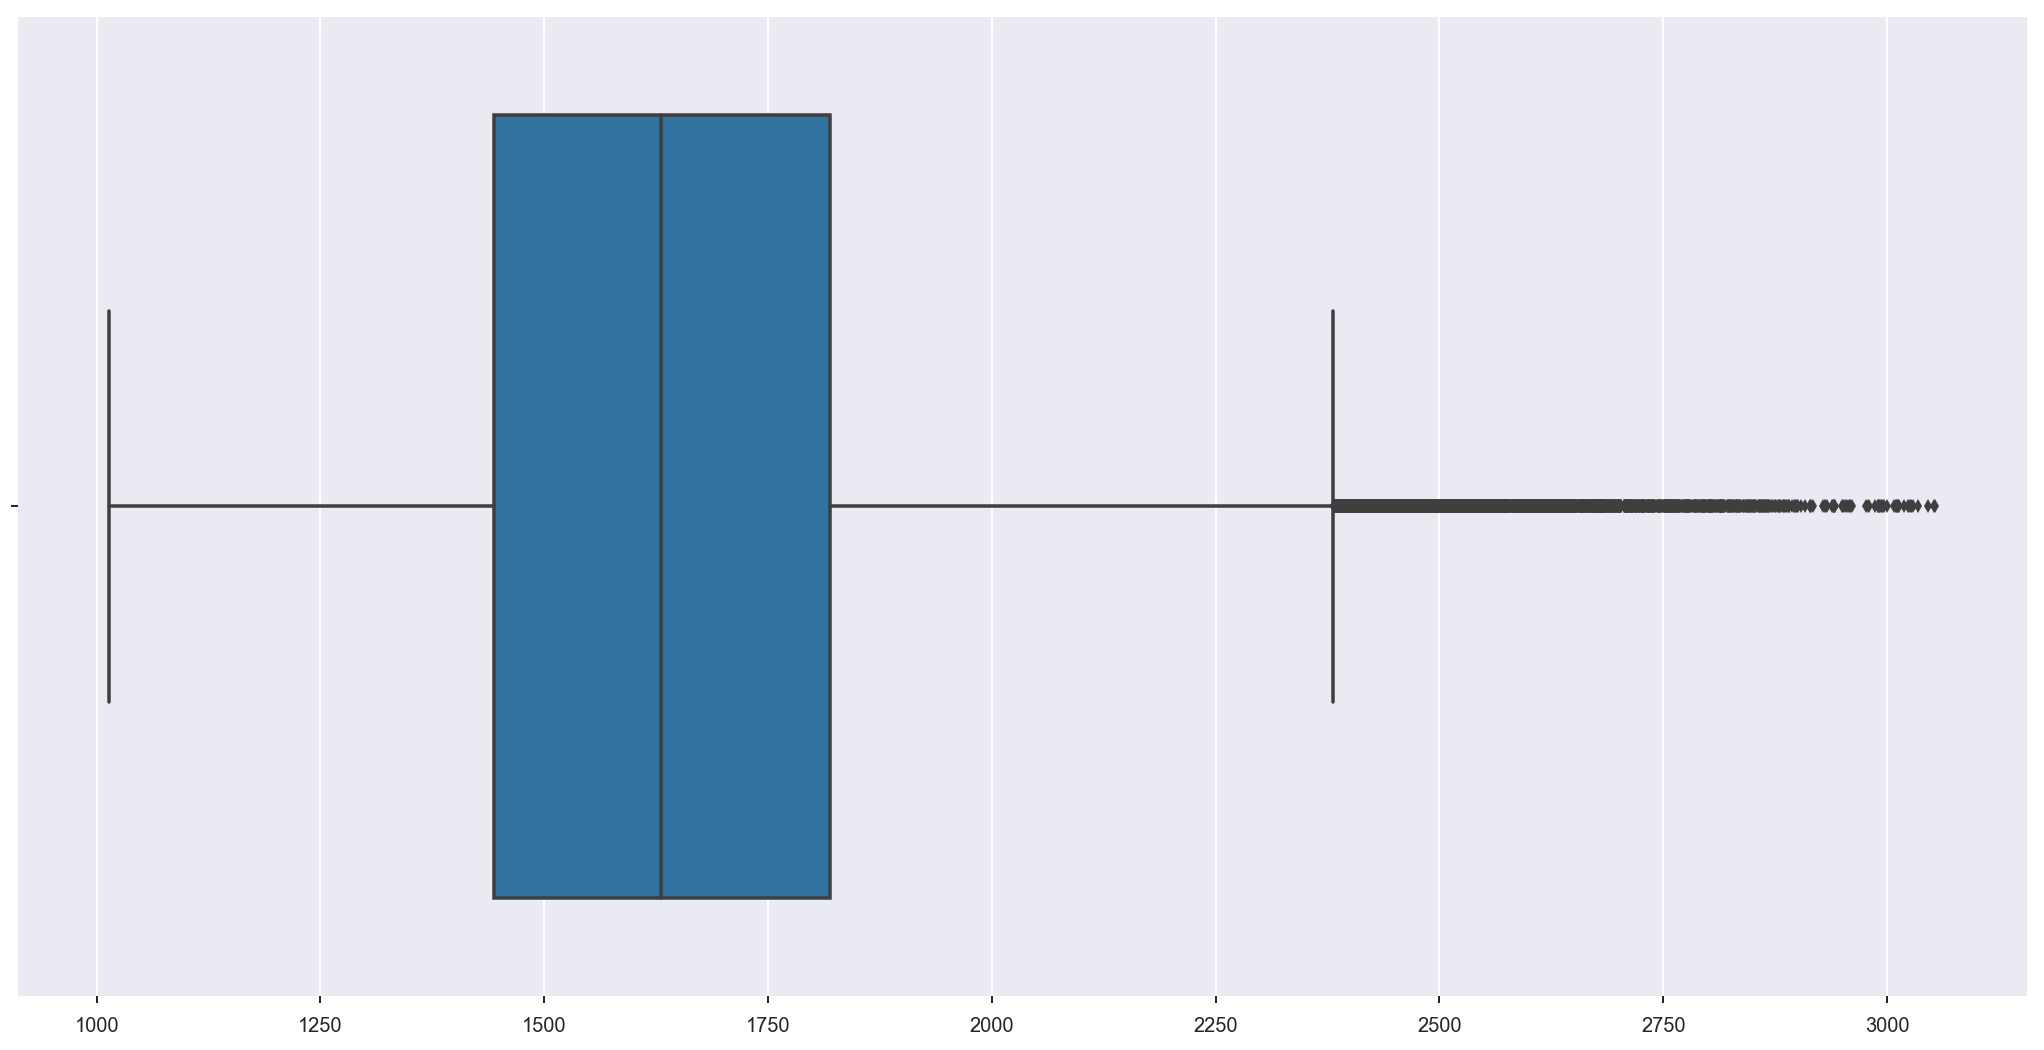

In [7]:
sns.boxplot(data.values)

In [8]:
data['DUQ_MW'].isnull().sum()

0

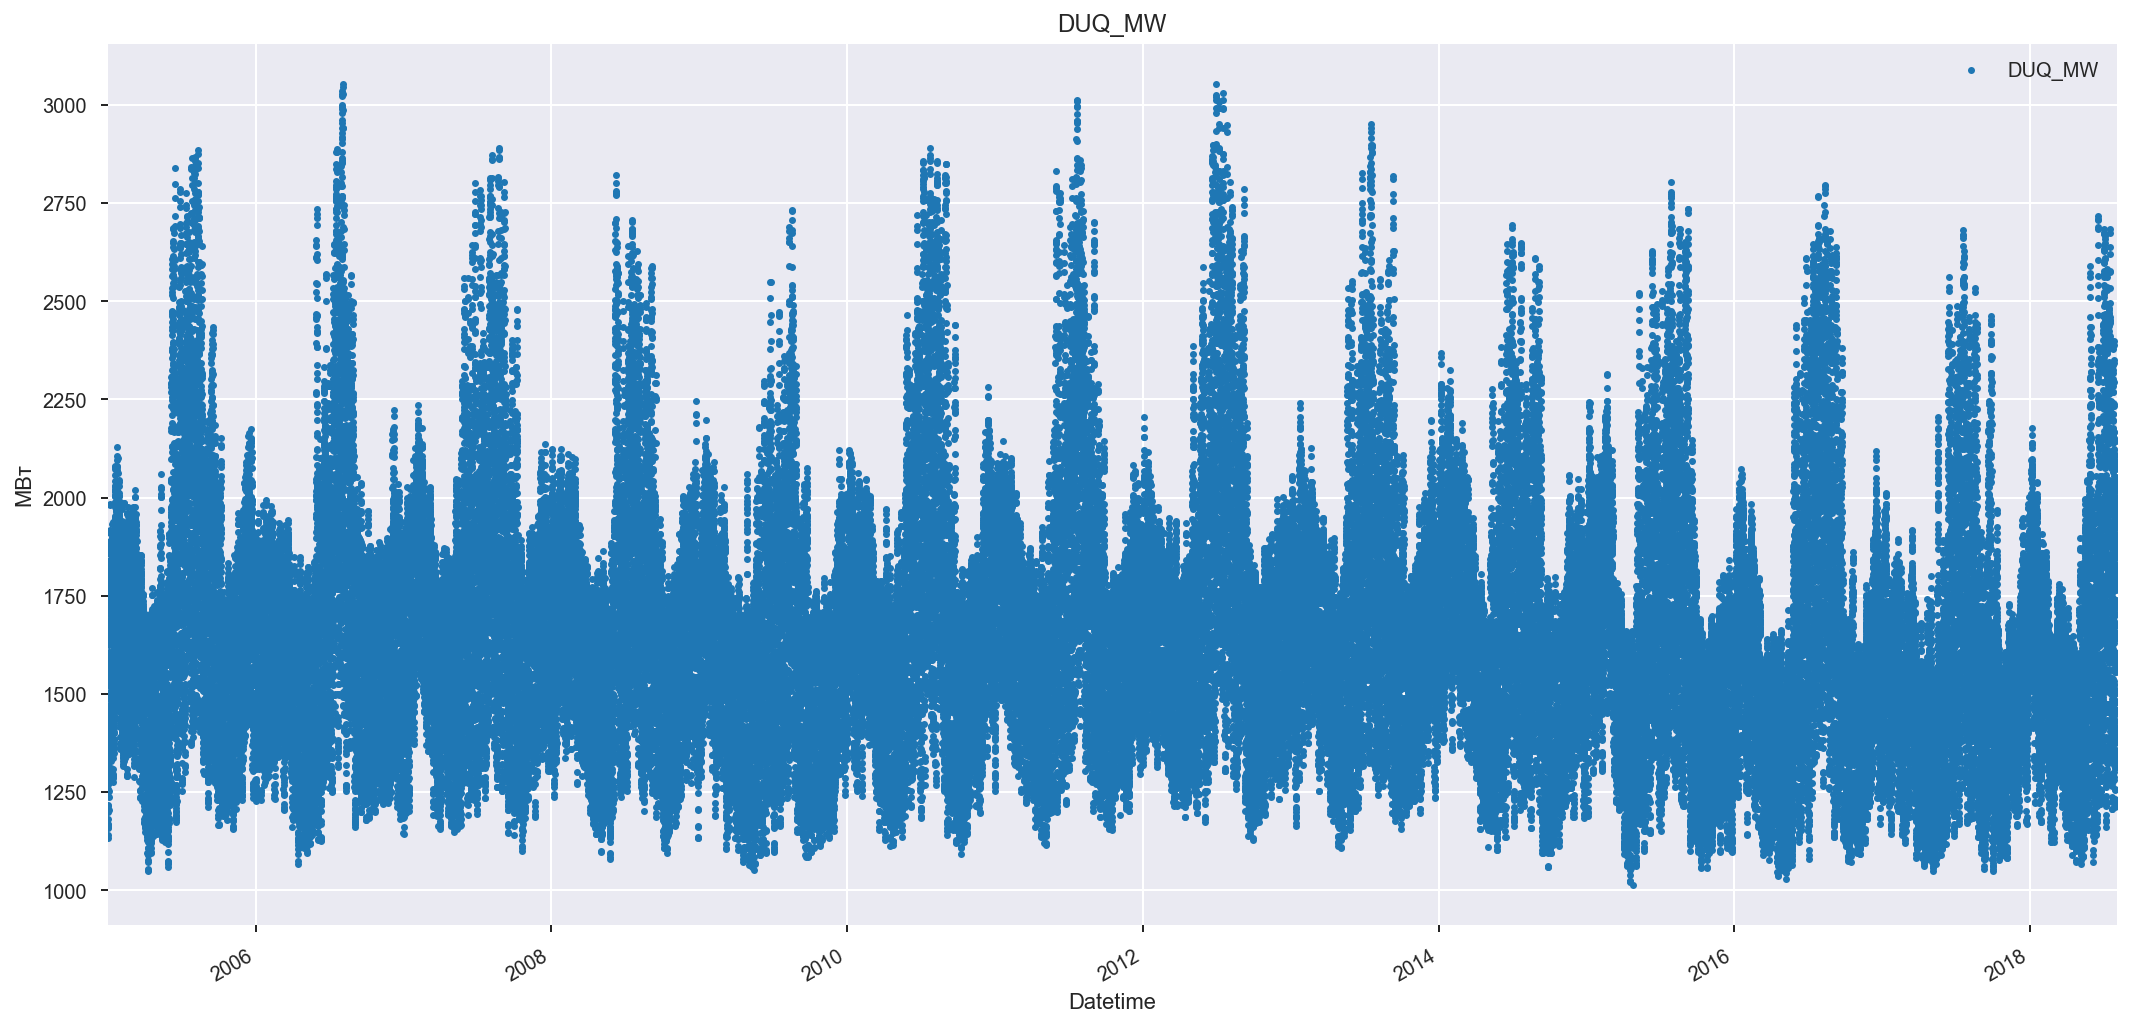

In [9]:
data.plot(style = '.', title = 'DUQ_MW')
plt.ylabel ( 'МВт' )
plt.show()

In [10]:
pandas_profiling.ProfileReport(data)

In [11]:
data['date'] = data.index
data_2012 = data.loc[data['date'].dt.year == 2012]

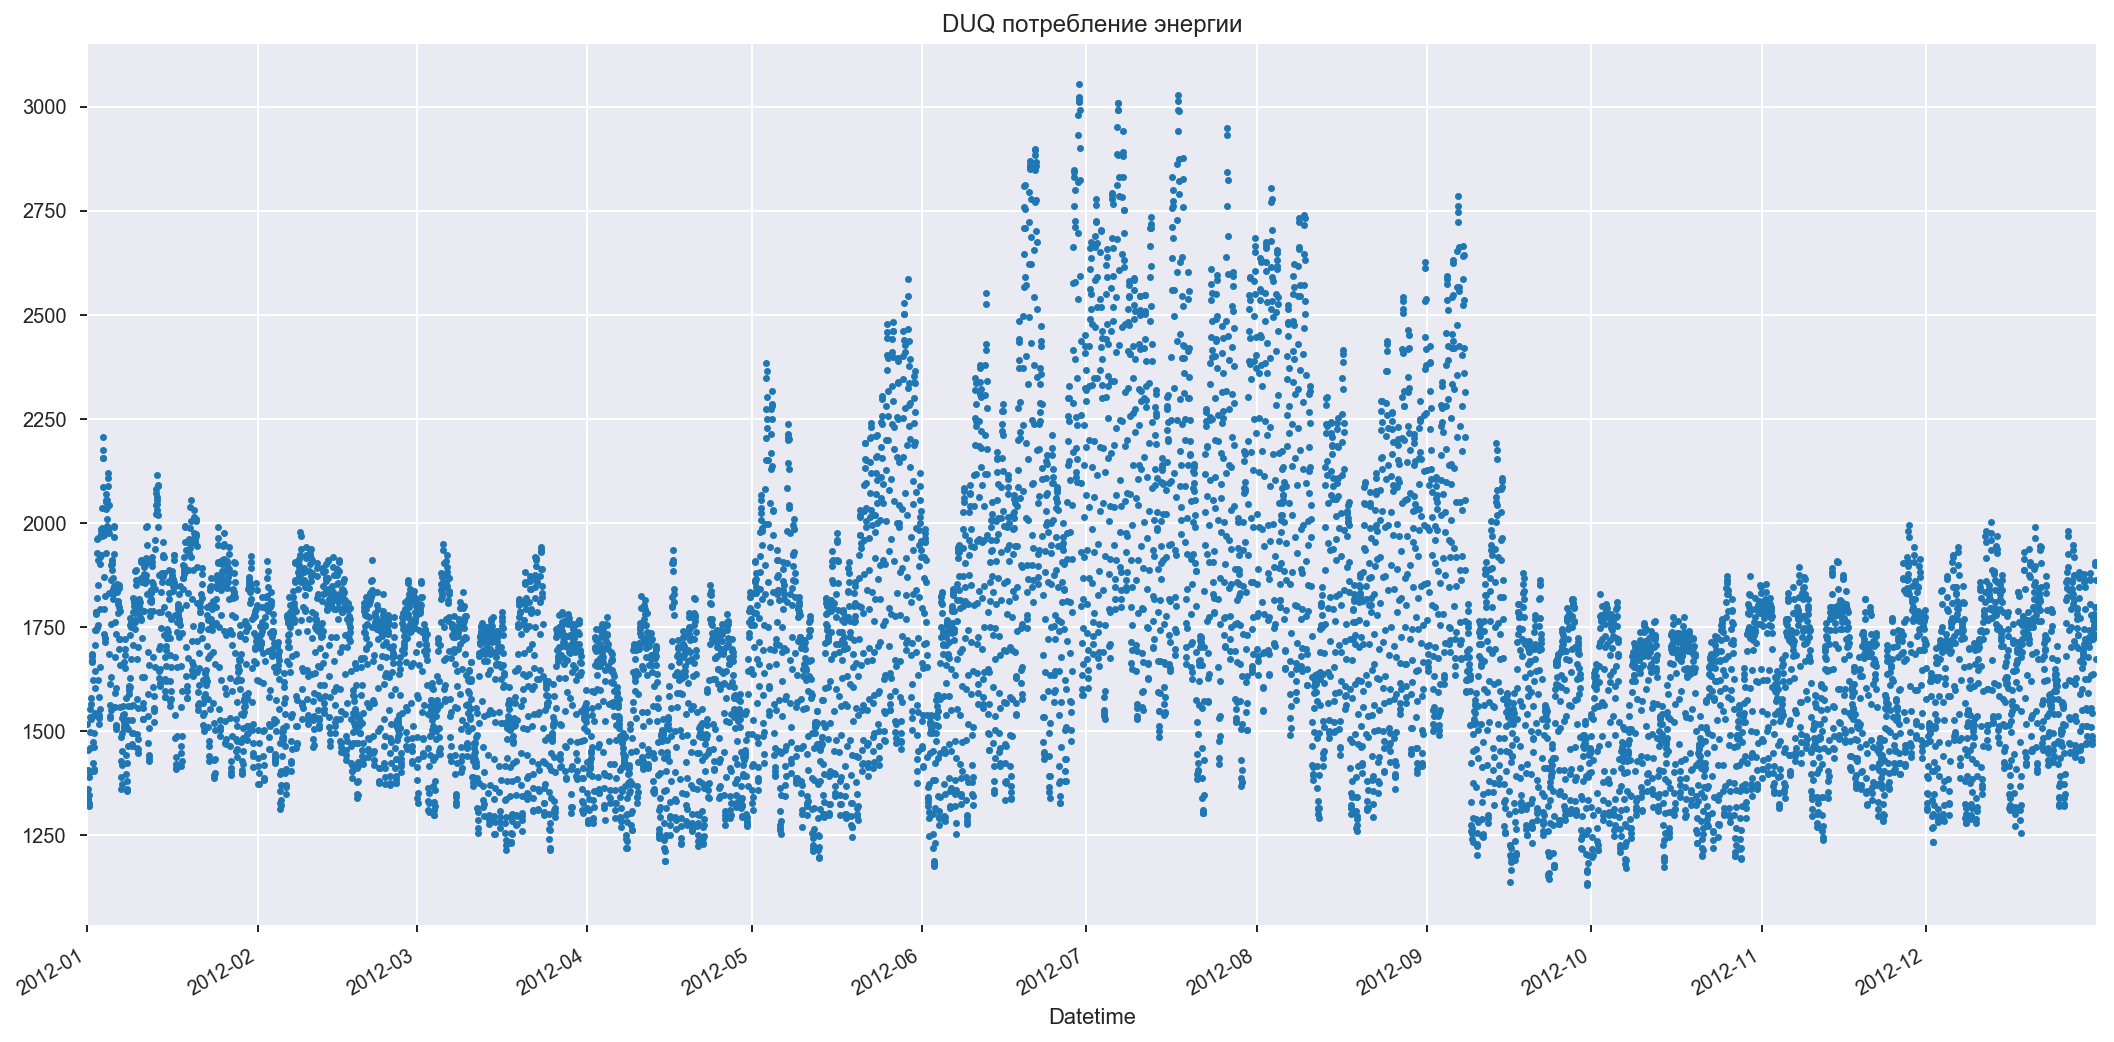

In [12]:
data_2012['DUQ_MW'].plot(style='.', title='DUQ потребление энергии' )
plt.show()

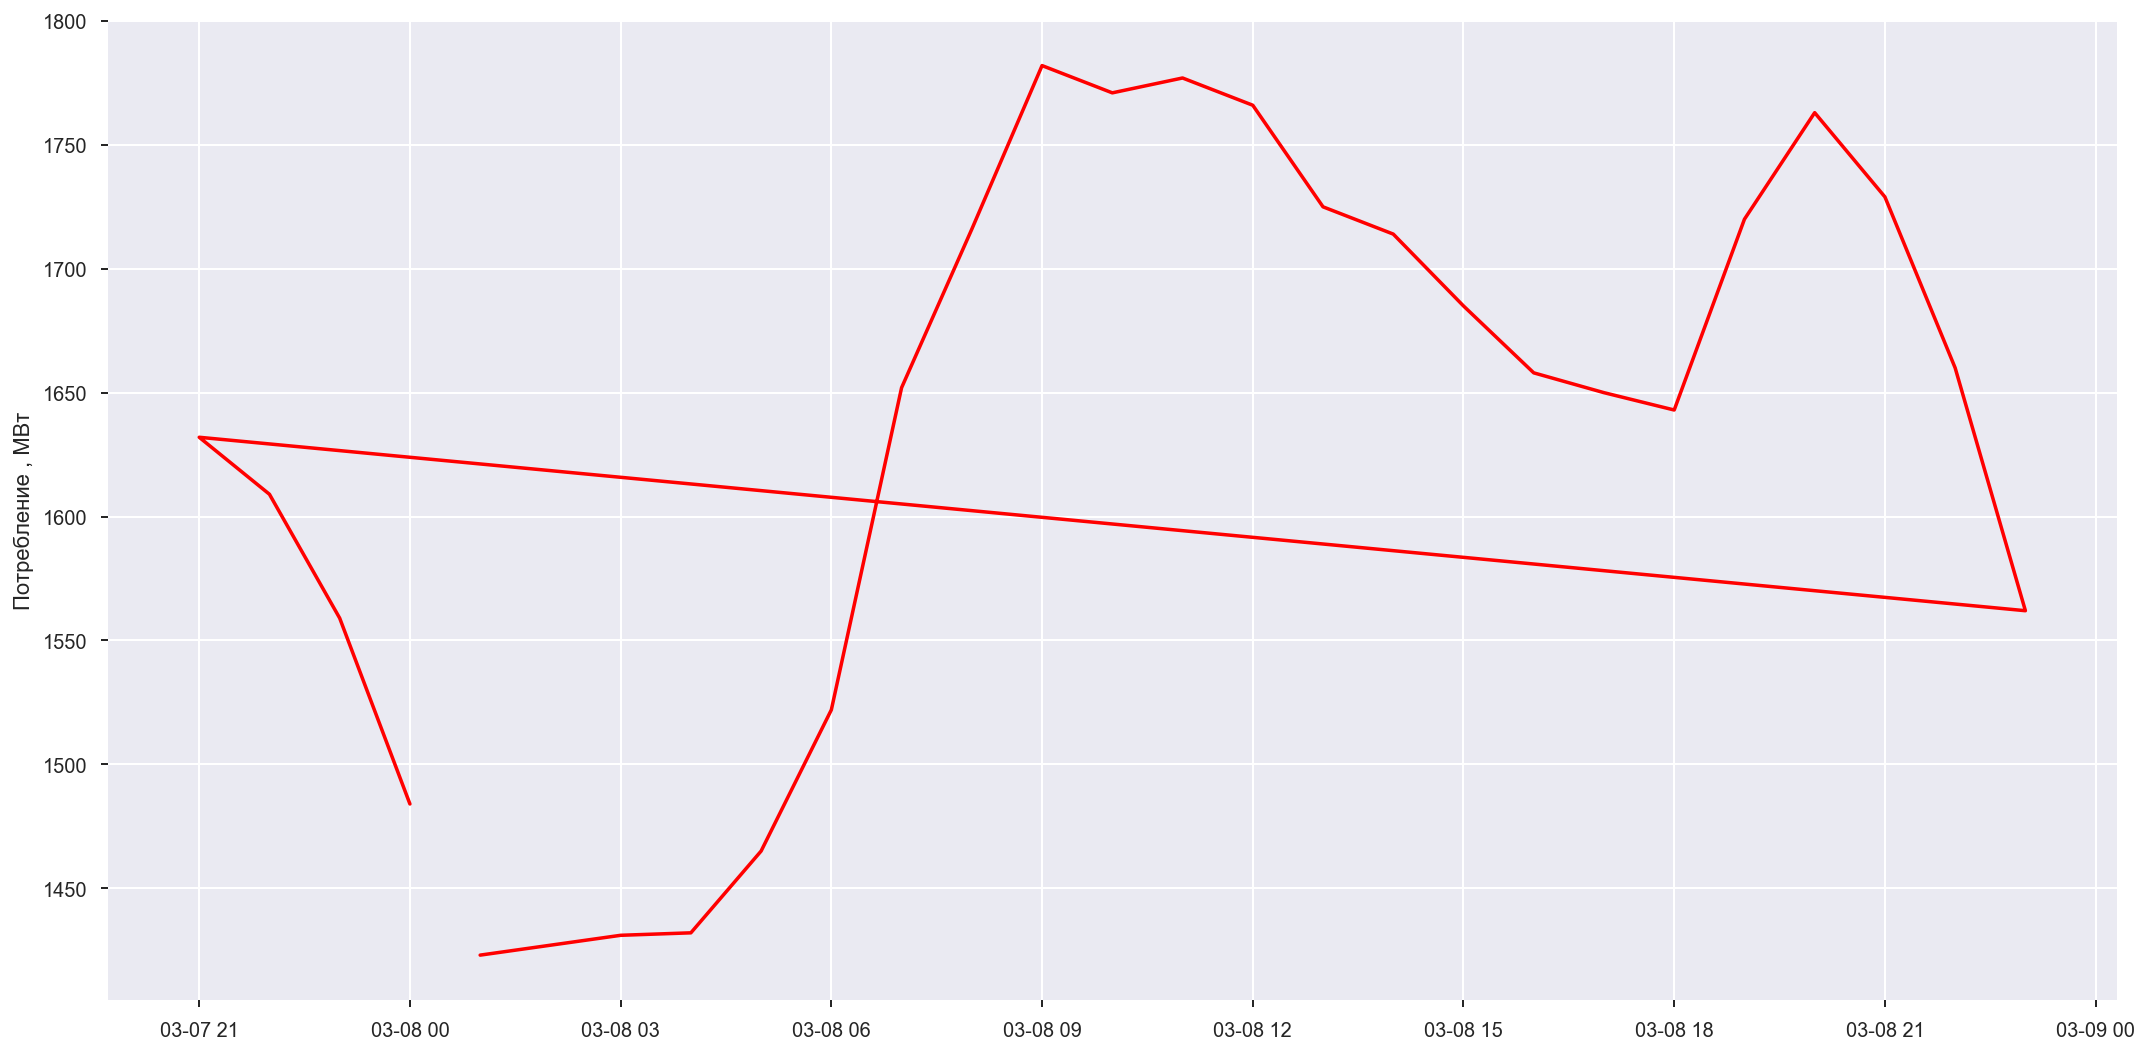

In [13]:
plt.plot(data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.show()

На мой взгляд, в данном датасете с данными все в порядке, за исключением их порядка в течение дня, но это легко поправимо. Пропущенных данных нет, выбросы так же не наблюдаются.

In [14]:
data.sort_index(inplace=True)

---

2. Прочитайте базу Brent и сделайте ее перрасчет (ресемплинг) в представление по неделям , по месяцам.

In [15]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


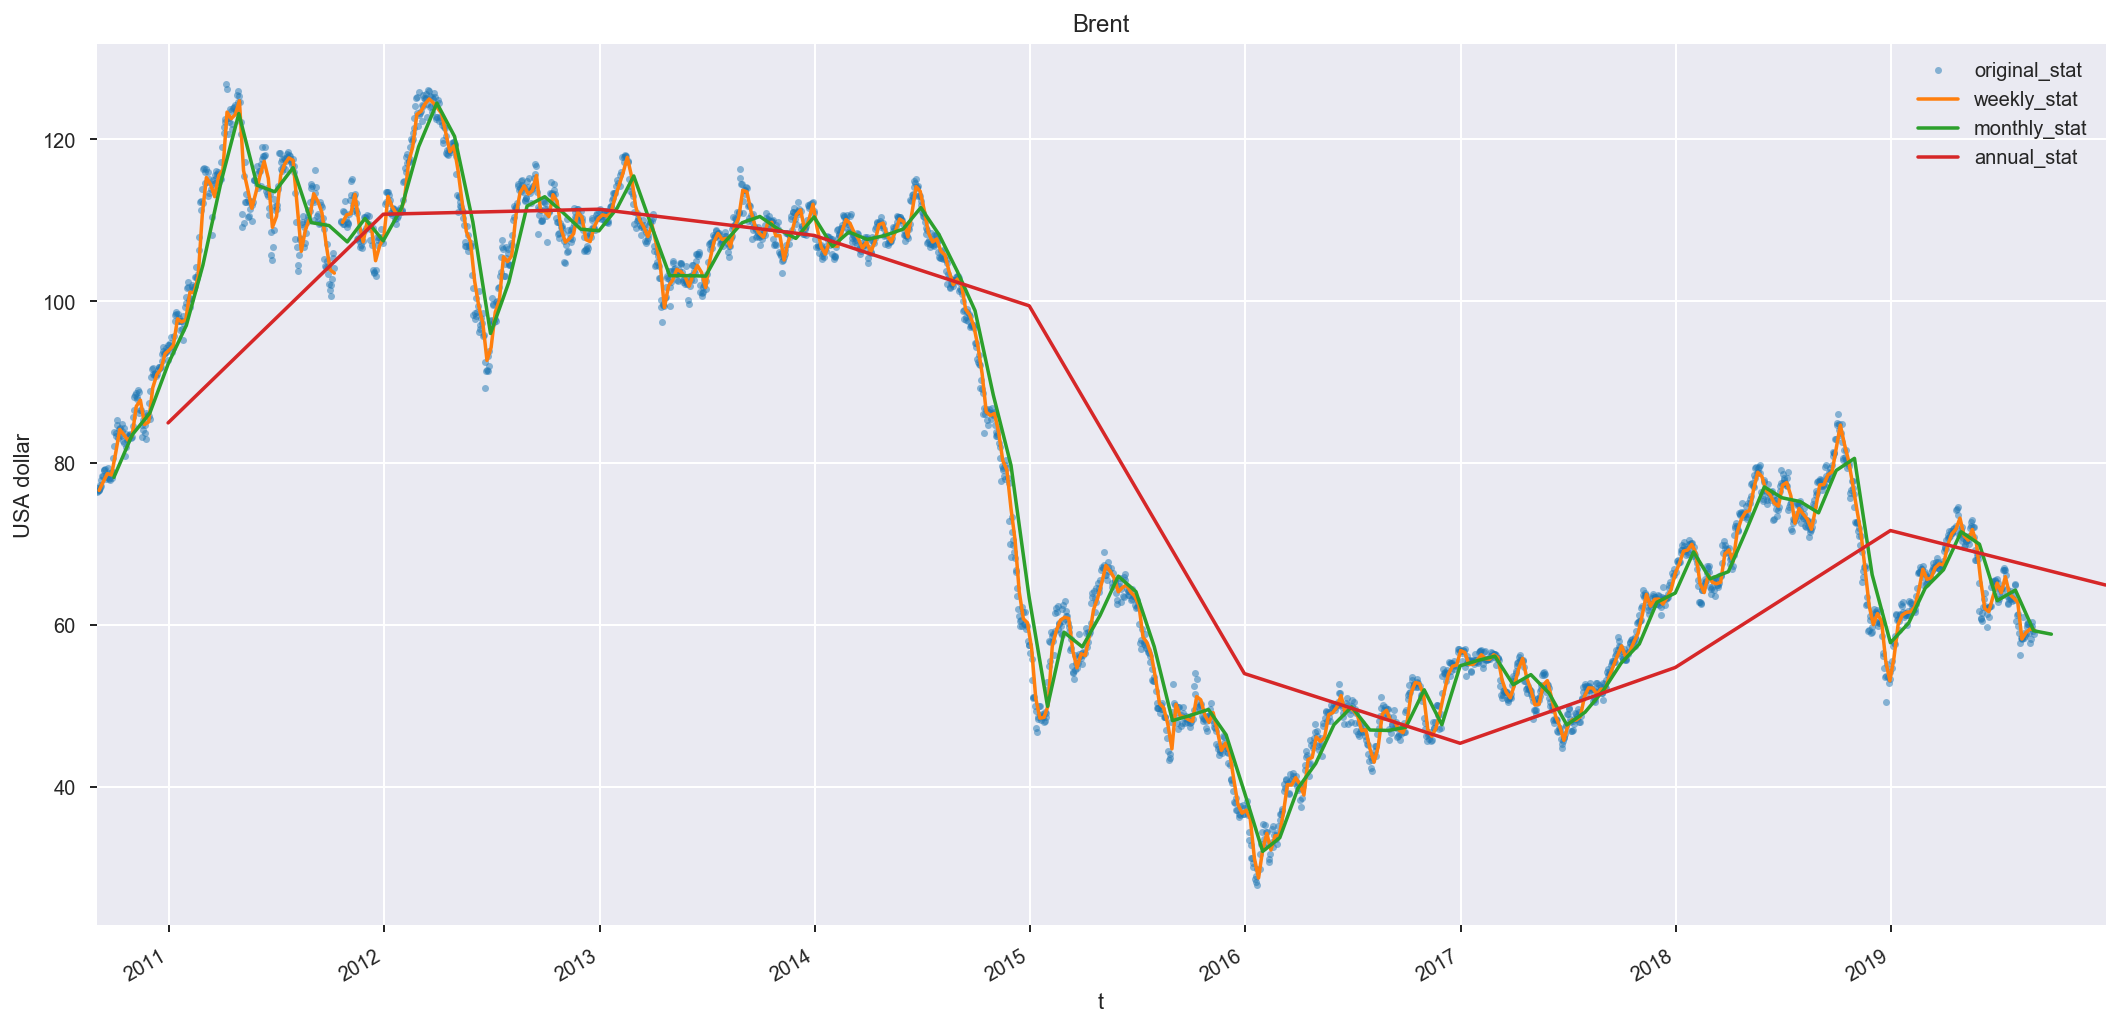

In [16]:
brent_data['Значение'].plot( style='.', alpha=0.5)
plt.title('Brent')
plt.ylabel('USA dollar')
brent_data['Значение'].resample('W').mean().plot()
brent_data['Значение'].resample('M').mean().plot()
brent_data['Значение'].resample('Y').mean().plot()
plt.xlabel('t')
plt.legend(['original_stat', 'weekly_stat', 'monthly_stat', 'annual_stat'])
plt.show()

---

3. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [17]:
orig_data = brent_data['Значение'].describe()
w_data = brent_data['Значение'].resample('W').mean().describe()
m_data = brent_data['Значение'].resample('M').mean().describe()
y_data = brent_data['Значение'].resample('Y').mean().describe()
frame = { 'original_stat': orig_data, 'weekly_stat': w_data, 'monthly_stat': m_data,'annual_stat': y_data} 
result = pd.DataFrame(frame).T

In [18]:
result

,count,mean,std,min,25%,50%,75%,max
original_stat,2667.0,81.533547,26.349469,27.850000,56.840000,77.710000,108.190000,126.900000
weekly_stat,469.0,80.712938,26.661299,28.690000,56.206000,76.601667,108.114000,125.006667
monthly_stat,109.0,80.571077,26.667645,31.984737,57.264074,75.704800,108.559167,124.502308
annual_stat,10.0,80.528219,25.682467,45.350502,57.270019,78.307329,105.961709,111.377484


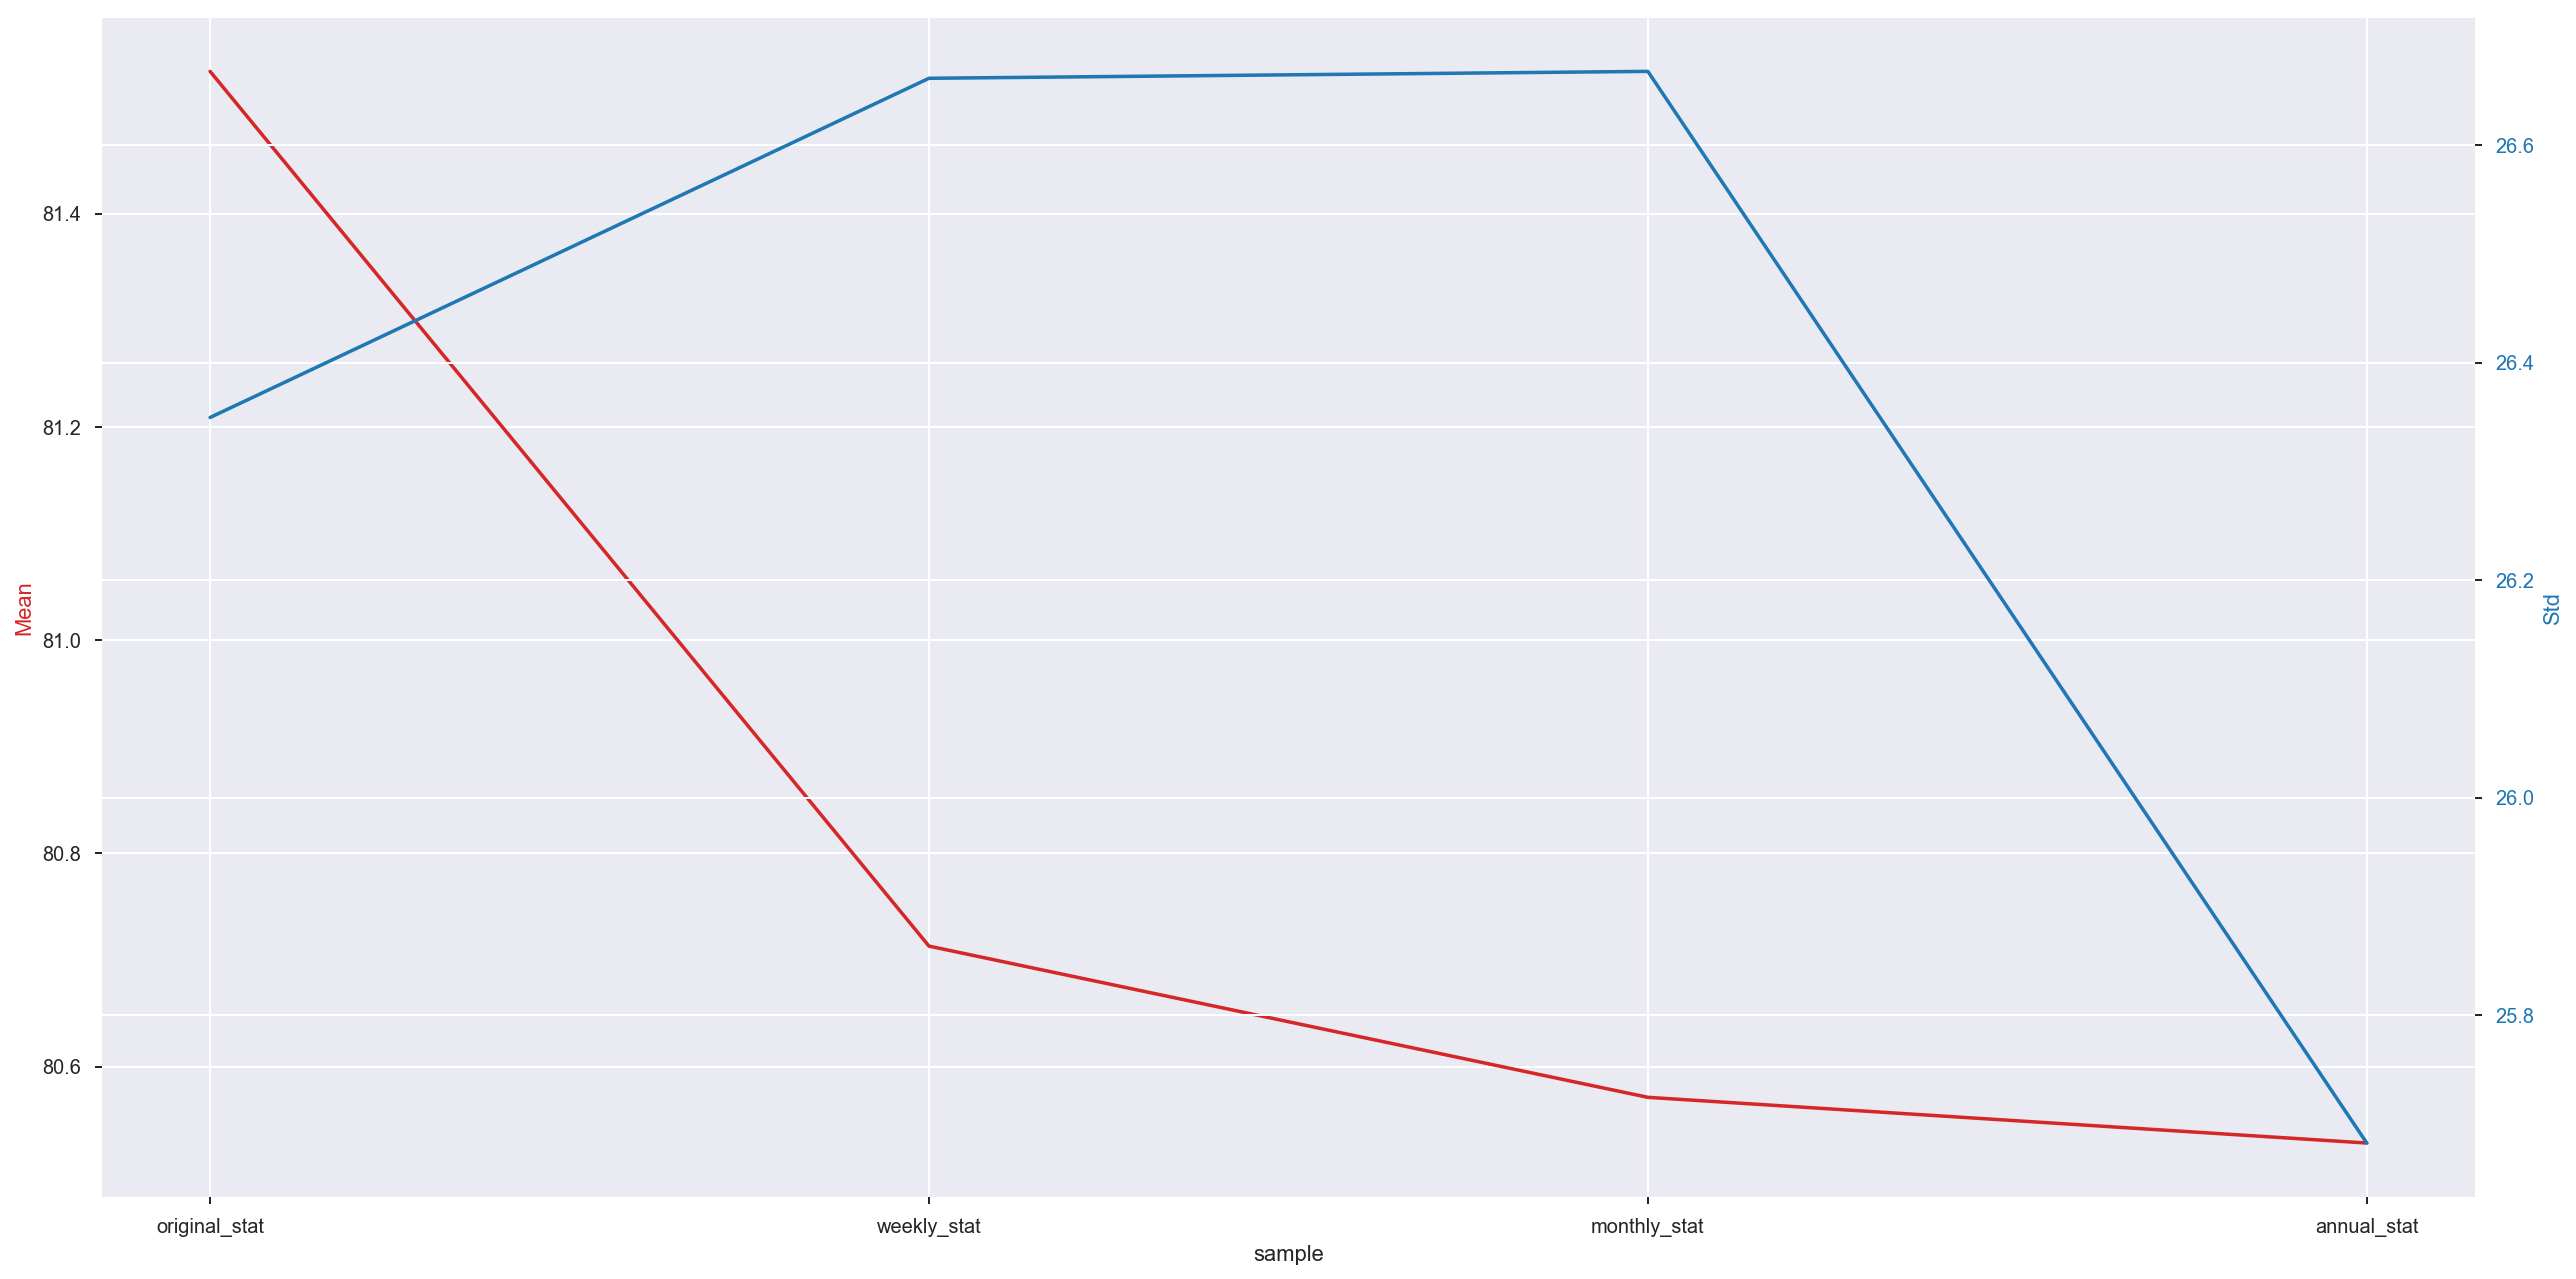

In [19]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('sample')
ax1.set_ylabel('Mean', color=color)
ax1.plot(result['mean'], color=color)
ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('Std', color=color) 
ax2.plot(result['std'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

---

4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

С увеличением интервала усреднения график становится более плавный, т.е. уменьшаются разбросы